<a href="https://colab.research.google.com/github/pejmanrasti/From_Shallow_to_Deep/blob/main/03_Teaxture_image_discriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Jupyter Notebook explores the effectiveness of different image feature extraction methods for image classification tasks.  It compares Local Binary Patterns (LBP), Uniform LBP (uLBP), Rotation-Invariant LBP (LBPri), and Histogram of Oriented Gradients (HOG) features.  The notebook utilizes the CIFAR-10 and Labeled Faces in the Wild (LFW) datasets to evaluate the performance of these features with Random Forest and Support Vector Machine (SVM) classifiers.

**Key Steps:**

1. **Dataset Loading and Preprocessing:**
   - Loads the CIFAR-10 dataset and LFW dataset.
   - Visualizes random samples from the datasets.
   - Converts CIFAR-10 images to grayscale. LFW images are already in grayscale.

2. **Feature Extraction:**
   - Implements functions to extract LBP, uLBP, LBPri, and HOG features from grayscale images.
   - Provides visualization of the extracted features for the first two images of each feature type.
   - Uses `tqdm` to display progress bars during the feature extraction process.

3. **Classification:**
   - Trains a Random Forest and an SVM classifier on the extracted features.
   - Uses a 70/30 train-test split to evaluate classifier performance.

4. **Evaluation and Visualization:**
   - Calculates and displays the accuracy of the Random Forest and SVM classifier for each feature type.
   - Generates bar plots to visually compare the accuracy scores of different feature types across both classifiers.


**Libraries Used:**

- **NumPy:** For numerical operations and array manipulation.
- **Matplotlib:** For creating plots and visualizations.
- **Scikit-image:** For image processing functions, including LBP and HOG feature extraction.
- **Scikit-learn:** For machine learning models (Random Forest and SVM), train-test splitting, and accuracy evaluation.
- **TensorFlow/Keras:** To load the CIFAR-10 dataset.
- **tqdm:** To display progress bars for loops.
- **sklearn.datasets:** To load the LFW dataset.


**Customization:**

-  The parameters for LBP (radius and points) can be adjusted.
-  The hyperparameters of the Random Forest and SVM classifiers (e.g., number of trees, kernel, C value) can be tuned for improved performance.

**Execution Instructions:**
- Run the notebook cell-by-cell from the top to the bottom.
- Ensure all the necessary libraries are installed. If not, install them using `!pip install <library_name>` in a separate code cell.

This notebook aims to help users understand and compare these four common image feature extraction methods in a practical context. The visualization tools enable a deeper understanding of how each method represents image data, and the performance comparisons help to select the best-performing feature type for a particular task.

Loading CIFAR-10 dataset...
Dataset loaded: 60000 samples, each of size 32x32x3.
Visualizing some sample images...


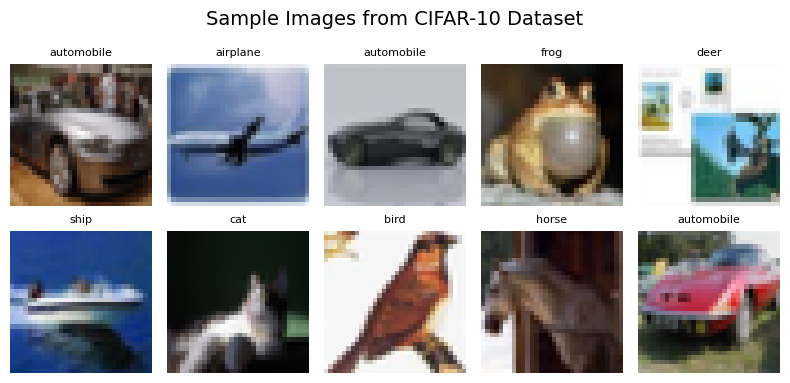

Converting images to grayscale...
Extracting LBP features...


  0%|          | 0/60000 [00:00<?, ?it/s]

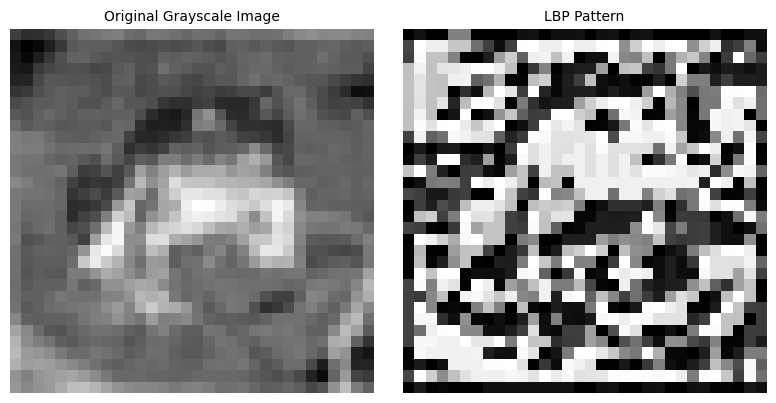

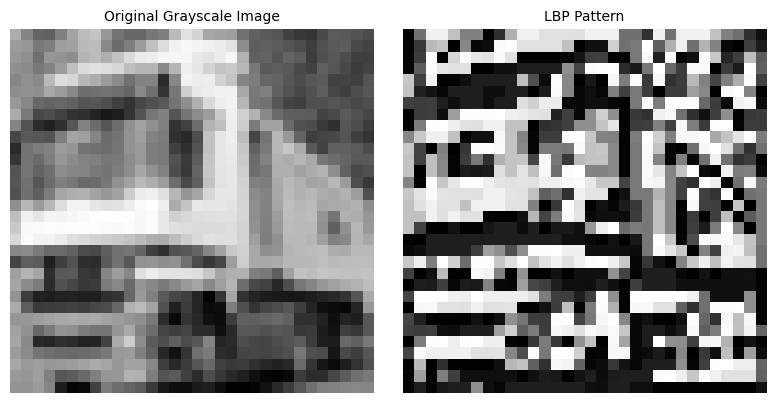

LBP features extracted.
Accuracy with LBP: 0.3977
Extracting uLBP features...


  0%|          | 0/60000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


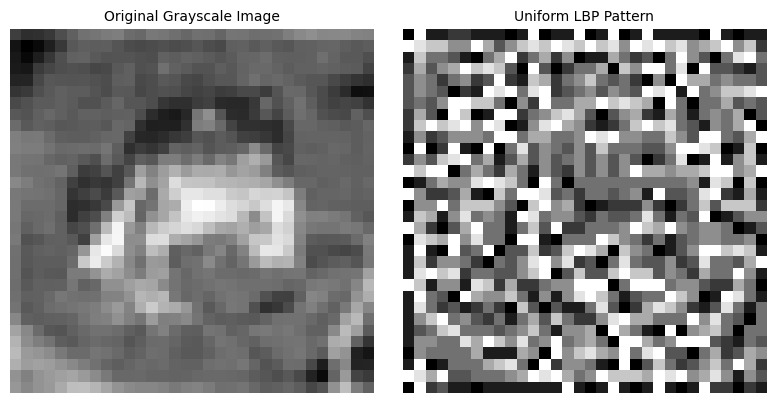

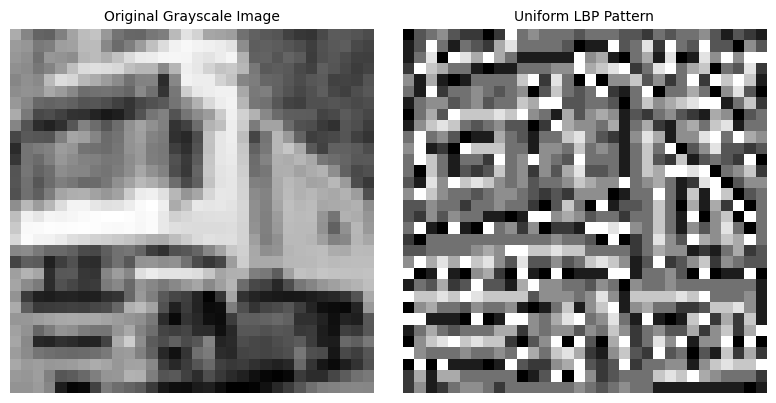

uLBP features extracted.
Accuracy with uLBP: 0.2744
Extracting LBPri features...


  0%|          | 0/60000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


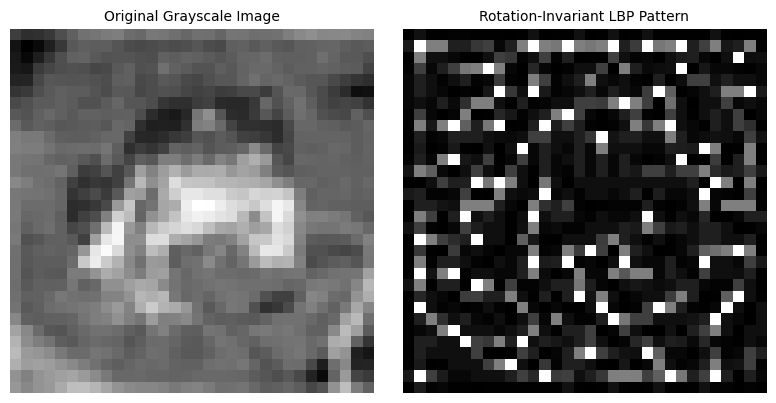

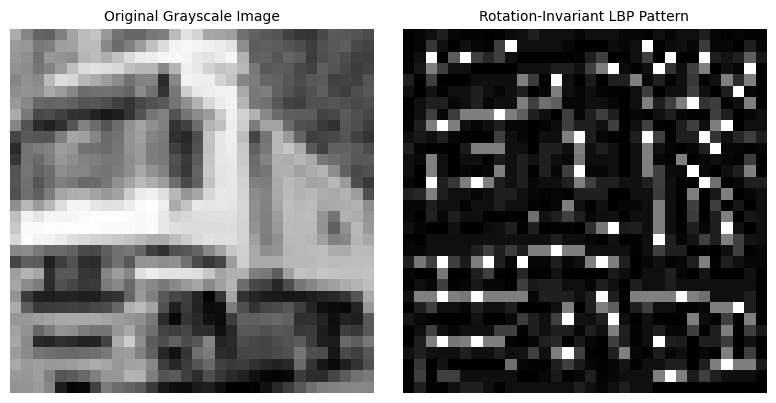

LBPri features extracted.
Accuracy with LBPri: 0.2968
Extracting HOG features...


  0%|          | 0/60000 [00:00<?, ?it/s]

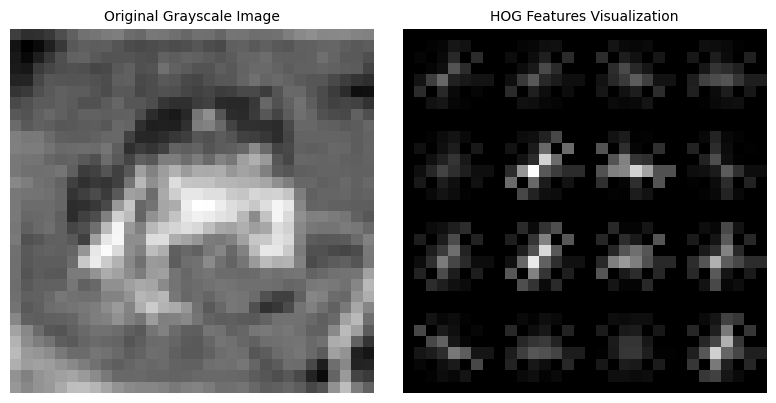

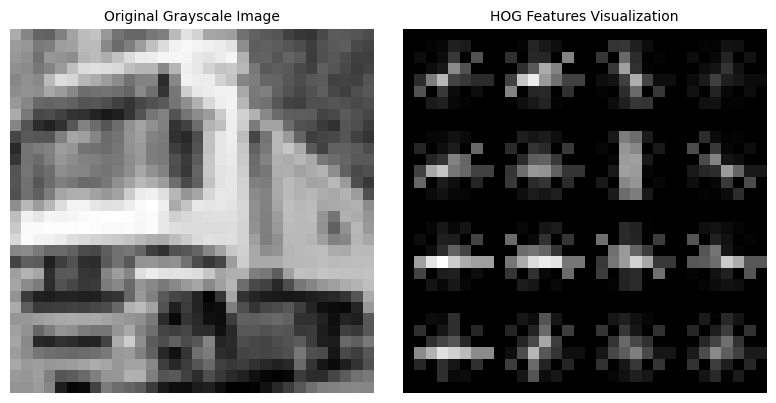

HOG features extracted.
Accuracy with HOG: 0.5043


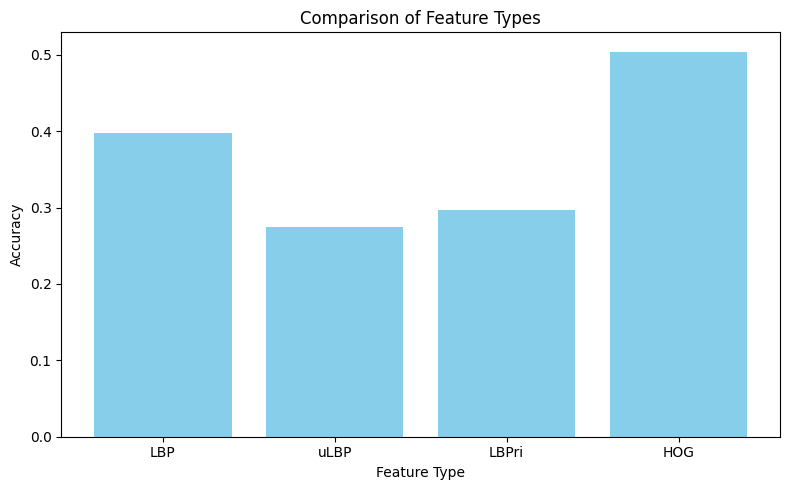

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tqdm.notebook import tqdm # Import tqdm for progress bar

# Define LBP settings
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Load CIFAR-10 dataset
def load_dataset():
    print("Loading CIFAR-10 dataset...")
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X = np.concatenate((X_train, X_test))  # Combine train and test sets
    y = np.concatenate((y_train, y_test)).flatten()  # Flatten labels
    print(f"Dataset loaded: {X.shape[0]} samples, each of size {X.shape[1]}x{X.shape[2]}x{X.shape[3]}.")
    return X, y

def visualize_samples(X, y, class_names):
    """
    Visualize some random samples from the dataset.
    """
    print("Visualizing some sample images...")
    plt.figure(figsize=(4, 2))
    for i in range(10):
        idx = np.random.randint(0, len(X))
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx])
        plt.title(class_names[y[idx]], fontsize=8)
        plt.axis('off')
    plt.suptitle("Sample Images from CIFAR-10 Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()

def preprocess_images(X):
    """
    Convert images to grayscale for feature extraction and visualize.
    """
    print("Converting images to grayscale...")
    X_gray = np.array([rgb2gray(image) for image in X])
    return X_gray

def visualize_lbp(image, lbp, title="LBP Pattern"):
    """
    Visualize LBP pattern for a single image.
    """
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Grayscale Image", fontsize=10)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def extract_features(image, feature_type, visualize=False):
    """
    Extract specified features from an image. Optionally visualize.
    """
    if feature_type == "LBP":
        lbp = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='default')
        if visualize:
            visualize_lbp(image, lbp, "LBP Pattern")
        return np.histogram(lbp.ravel(), bins=np.arange(257), density=True)[0]
    elif feature_type == "uLBP":
        ulbp = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')
        if visualize:
            visualize_lbp(image, ulbp, "Uniform LBP Pattern")
        return np.histogram(ulbp.ravel(), bins=np.arange(59), density=True)[0]
    elif feature_type == "LBPri":
        lbpri = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='ror')
        if visualize:
            visualize_lbp(image, lbpri, "Rotation-Invariant LBP Pattern")
        return np.histogram(lbpri.ravel(), bins=np.arange(257), density=True)[0]
    elif feature_type == "HOG":
        features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        if visualize:
            plt.figure(figsize=(4, 2))
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title("Original Grayscale Image", fontsize=10)
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title("HOG Features Visualization", fontsize=10)
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        return features
    else:
        raise ValueError("Unknown feature type")


def process_dataset(X, feature_type):
    """
    Process dataset to extract features for all images. Visualize for the first 2 examples.
    """
    print(f"Extracting {feature_type} features...")
    features = []
    for i, image in tqdm(enumerate(X), total=len(X)): # Use tqdm here
        visualize = i < 2  # Visualize only for the first 2 images
        features.append(extract_features(image, feature_type, visualize=visualize))
    print(f"{feature_type} features extracted.")
    return np.array(features)

def evaluate_feature_type(X, y, feature_type):
    """
    Train and evaluate Random Forest classifier with specified features.
    """
    features = process_dataset(X, feature_type)
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {feature_type}: {accuracy:.4f}")
    return accuracy

def main():
    # Load dataset
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    X, y = load_dataset()

    # Visualize samples
    visualize_samples(X, y, class_names)

    # Preprocess images to grayscale
    X_gray = preprocess_images(X)

    # Feature types to evaluate
    feature_types = ["LBP", "uLBP", "LBPri", "HOG"]
    accuracies = []

    for feature_type in feature_types:
        accuracy = evaluate_feature_type(X_gray, y, feature_type)
        accuracies.append(accuracy)

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.bar(feature_types, accuracies, color='skyblue')
    plt.title("Comparison of Feature Types")
    plt.ylabel("Accuracy")
    plt.xlabel("Feature Type")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Loading LFW dataset...
Dataset loaded: 1288 samples, each of size 50x37.
Visualizing some sample images...


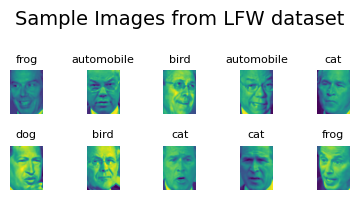

Images are already in grayscale.
Extracting LBP features...


  0%|          | 0/1288 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


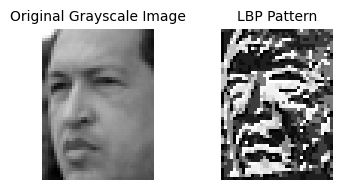

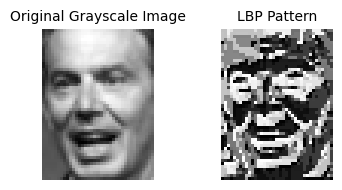

LBP features extracted.
Random Forest Accuracy with LBP: 0.5323
SVM Accuracy with LBP: 0.4289
Extracting uLBP features...


  0%|          | 0/1288 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


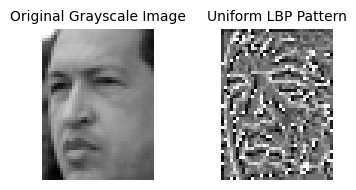

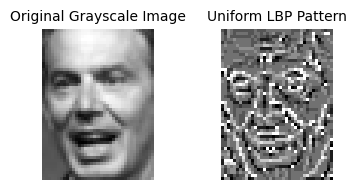

uLBP features extracted.
Random Forest Accuracy with uLBP: 0.5013
SVM Accuracy with uLBP: 0.4289
Extracting LBPri features...


  0%|          | 0/1288 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


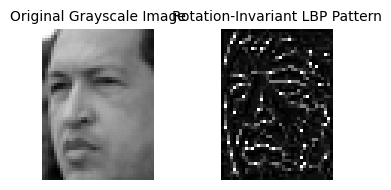

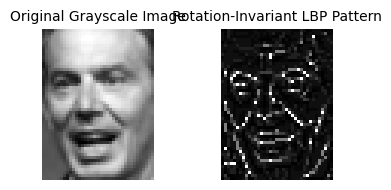

LBPri features extracted.
Random Forest Accuracy with LBPri: 0.5090
SVM Accuracy with LBPri: 0.4289
Extracting HOG features...


  0%|          | 0/1288 [00:00<?, ?it/s]

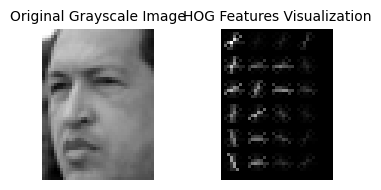

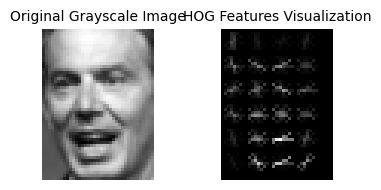

HOG features extracted.
Random Forest Accuracy with HOG: 0.6537
SVM Accuracy with HOG: 0.8501


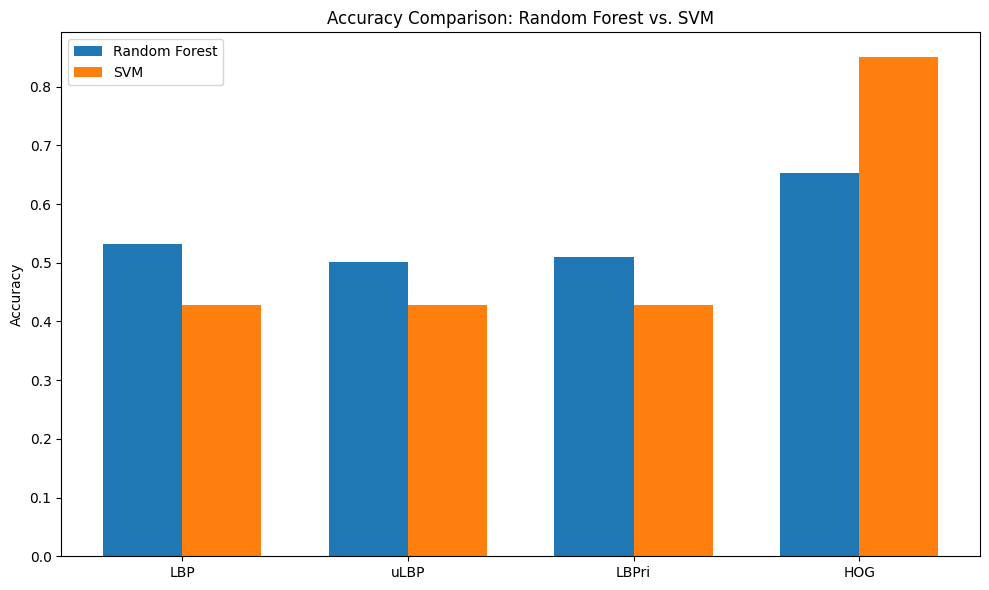

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_lfw_people

# Define LBP settings
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Load LFW dataset
def load_dataset():
    print("Loading LFW dataset...")
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    X = lfw_people.images
    y = lfw_people.target
    print(f"Dataset loaded: {X.shape[0]} samples, each of size {X.shape[1]}x{X.shape[2]}.")
    return X, y

def visualize_samples(X, y, class_names):
    """
    Visualize some random samples from the dataset.
    """
    print("Visualizing some sample images...")
    plt.figure(figsize=(4, 2))
    for i in range(10):
        idx = np.random.randint(0, len(X))
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx])
        plt.title(class_names[y[idx]], fontsize=8)
        plt.axis('off')
    plt.suptitle("Sample Images from LFW dataset", fontsize=14)
    plt.tight_layout()
    plt.show()

def preprocess_images(X):
    """
    Images are already in grayscale, so this function is not needed for LFW.
    Keeping it here for consistency but simply returning the input.
    """
    print("Images are already in grayscale.")
    return X  # Return the original images as they are already grayscale

def visualize_lbp(image, lbp, title="LBP Pattern"):
    """
    Visualize LBP pattern for a single image.
    """
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Grayscale Image", fontsize=10)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def extract_features(image, feature_type, visualize=False):
    """
    Extract specified features from an image. Optionally visualize.
    """
    if feature_type == "LBP":
        lbp = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='default')
        if visualize:
            visualize_lbp(image, lbp, "LBP Pattern")
        return np.histogram(lbp.ravel(), bins=np.arange(257), density=True)[0]
    elif feature_type == "uLBP":
        ulbp = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')
        if visualize:
            visualize_lbp(image, ulbp, "Uniform LBP Pattern")
        return np.histogram(ulbp.ravel(), bins=np.arange(59), density=True)[0]
    elif feature_type == "LBPri":
        lbpri = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='ror')
        if visualize:
            visualize_lbp(image, lbpri, "Rotation-Invariant LBP Pattern")
        return np.histogram(lbpri.ravel(), bins=np.arange(257), density=True)[0]
    elif feature_type == "HOG":
        features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, feature_vector=True)
        if visualize:
            plt.figure(figsize=(4, 2))
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title("Original Grayscale Image", fontsize=10)
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title("HOG Features Visualization", fontsize=10)
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        return features
    else:
        raise ValueError("Unknown feature type")


def process_dataset(X, feature_type):
    """
    Process dataset to extract features for all images. Visualize for the first 2 examples.
    """
    print(f"Extracting {feature_type} features...")
    features = []
    for i, image in tqdm(enumerate(X), total=len(X)): # Use tqdm here
        visualize = i < 2  # Visualize only for the first 2 images
        features.append(extract_features(image, feature_type, visualize=visualize))
    print(f"{feature_type} features extracted.")
    return np.array(features)


def evaluate_feature_type(X, y, feature_type):
    """
    Train and evaluate Random Forest and SVM classifiers with specified features.
    """
    features = process_dataset(X, feature_type)
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_y_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    print(f"Random Forest Accuracy with {feature_type}: {rf_accuracy:.4f}")

    # SVM
    svm_model = SVC(kernel='linear', C=1, random_state=42) # You can adjust the kernel and C
    svm_model.fit(X_train, y_train)
    svm_y_pred = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_y_pred)
    print(f"SVM Accuracy with {feature_type}: {svm_accuracy:.4f}")

    return rf_accuracy, svm_accuracy

def main():
    # Load dataset
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    X, y = load_dataset()

    # Visualize samples
    visualize_samples(X, y, class_names)

    # Preprocess images to grayscale
    X_gray = preprocess_images(X)

    feature_types = ["LBP", "uLBP", "LBPri", "HOG"]
    rf_accuracies = []
    svm_accuracies = []

    for feature_type in feature_types:
        rf_accuracy, svm_accuracy = evaluate_feature_type(X_gray, y, feature_type)
        rf_accuracies.append(rf_accuracy)
        svm_accuracies.append(svm_accuracy)

    # Plot results
    x = np.arange(len(feature_types))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, rf_accuracies, width, label='Random Forest')
    rects2 = ax.bar(x + width/2, svm_accuracies, width, label='SVM')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Comparison: Random Forest vs. SVM')
    ax.set_xticks(x)
    ax.set_xticklabels(feature_types)
    ax.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()